In [1]:
import pandas as pd
from scipy.spatial import distance
import numpy as np
import random
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import normalize
from scipy.stats import zscore
#https://www.google.com/covid19/mobility/
url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
url = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url2021 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df20 = pd.read_csv(url2021)
df20

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-01,-88.0,-64.0,-71.0,-81.0,-81.0,38.0
1,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-02,-86.0,-57.0,-71.0,-77.0,-64.0,29.0
2,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-03,-85.0,-57.0,-66.0,-74.0,-50.0,21.0
3,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-04,-33.0,18.0,4.0,-17.0,-20.0,7.0
4,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-05,-38.0,12.0,-8.0,-21.0,-22.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158425,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-01,-12.0,101.0,NaN,-17.0,-15.0,3.0
158426,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-02,-14.0,65.0,NaN,-9.0,-17.0,1.0
158427,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-03,-20.0,NaN,NaN,-19.0,-24.0,2.0
158428,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-04,-8.0,111.0,NaN,-4.0,-15.0,1.0


In [2]:
df20=df20.dropna(axis=1,how='all')
df20=df20.drop(df20.columns[[0,1,2, 3,4,5, 6]], axis = 1)
df20["residential_percent_change_from_baseline"].isna().sum()

df20["retail_and_recreation_percent_change_from_baseline"].fillna( method ='ffill', inplace = True)
df20["grocery_and_pharmacy_percent_change_from_baseline"].fillna( method ='ffill', inplace = True)
df20["parks_percent_change_from_baseline"].fillna( method ='ffill', inplace = True)
df20["transit_stations_percent_change_from_baseline"].fillna( method ='ffill', inplace = True)
df20["residential_percent_change_from_baseline"].fillna( method ='ffill', inplace = True)
df20["workplaces_percent_change_from_baseline"].fillna( method ='ffill', inplace = True)
df20


,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,-88.0,-64.0,-71.0,-81.0,-81.0,38.0
1,-86.0,-57.0,-71.0,-77.0,-64.0,29.0
2,-85.0,-57.0,-66.0,-74.0,-50.0,21.0
3,-33.0,18.0,4.0,-17.0,-20.0,7.0
4,-38.0,12.0,-8.0,-21.0,-22.0,10.0
...,...,...,...,...,...,...
158425,-12.0,101.0,35.0,-17.0,-15.0,3.0
158426,-14.0,65.0,35.0,-9.0,-17.0,1.0
158427,-20.0,65.0,35.0,-19.0,-24.0,2.0
158428,-8.0,111.0,35.0,-4.0,-15.0,1.0


In [3]:
sample_z=df20.apply(zscore)
sample_z

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,-2.078105,-2.356137,-1.375392,-1.659213,-3.002370,4.514019
1,-2.031534,-2.203426,-1.375392,-1.579757,-2.191474,3.362215
2,-2.008249,-2.203426,-1.294460,-1.520164,-1.523678,2.338389
3,-0.797407,-0.567236,-0.161403,-0.387905,-0.092685,0.546694
4,-0.913834,-0.698131,-0.355641,-0.467362,-0.188085,0.930629
...,...,...,...,...,...,...
158425,-0.308413,1.243481,0.340380,-0.387905,0.145813,0.034781
158426,-0.354984,0.458110,0.340380,-0.228992,0.050414,-0.221175
158427,-0.494697,0.458110,0.340380,-0.427634,-0.283484,-0.093197
158428,-0.215272,1.461640,0.340380,-0.129671,0.145813,-0.221175


In [5]:
def outlier_removal(df, variable):
    upper_limit = df[variable].mean() + 1.5 * df[variable].std()
    lower_limit = df[variable].mean() - 1.5 * df[variable].std()
    return upper_limit, lower_limit

In [6]:
upper_limit, lower_limit = outlier_removal(sample_z, "retail_and_recreation_percent_change_from_baseline")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

upper_limit1, lower_limit1 = outlier_removal(sample_z, "grocery_and_pharmacy_percent_change_from_baseline")
print("Upper limit: ", upper_limit1)
print("Lower Limit: ",lower_limit1)

upper_limit2, lower_limit2 = outlier_removal(sample_z, "parks_percent_change_from_baseline")
print("Upper limit: ", upper_limit2)
print("Lower Limit: ",lower_limit2)

upper_limit3, lower_limit3 = outlier_removal(sample_z, "transit_stations_percent_change_from_baseline")
print("Upper limit: ", upper_limit3)
print("Lower Limit: ",lower_limit3)

upper_limit4, lower_limit4 = outlier_removal(sample_z, "workplaces_percent_change_from_baseline")
print("Upper limit: ", upper_limit4)
print("Lower Limit: ",lower_limit4)

upper_limit5, lower_limit5 = outlier_removal(sample_z, "residential_percent_change_from_baseline")
print("Upper limit: ", upper_limit5)
print("Lower Limit: ",lower_limit5)

Upper limit:  1.5000047339743205
Lower Limit:  -1.5000047339743419
Upper limit:  1.5000047339740046
Lower Limit:  -1.5000047339740041
Upper limit:  1.5000047339741136
Lower Limit:  -1.5000047339741243
Upper limit:  1.5000047339739457
Lower Limit:  -1.500004733973952
Upper limit:  1.5000047339742382
Lower Limit:  -1.500004733974235
Upper limit:  1.5000047339742801
Lower Limit:  -1.5000047339742792


In [7]:
sample_z[(sample_z['retail_and_recreation_percent_change_from_baseline'] < lower_limit) | (sample_z['retail_and_recreation_percent_change_from_baseline'] > upper_limit)]
sample_z[(sample_z['grocery_and_pharmacy_percent_change_from_baseline'] < lower_limit1) | (sample_z['grocery_and_pharmacy_percent_change_from_baseline'] > upper_limit1)]
sample_z[(sample_z['parks_percent_change_from_baseline'] < lower_limit2) | (sample_z['parks_percent_change_from_baseline'] > upper_limit2)]
sample_z[(sample_z['transit_stations_percent_change_from_baseline'] < lower_limit3) | (sample_z['transit_stations_percent_change_from_baseline'] > upper_limit3)]
sample_z[(sample_z['workplaces_percent_change_from_baseline'] < lower_limit4) | (sample_z['workplaces_percent_change_from_baseline'] > upper_limit4)]
sample_z[(sample_z['residential_percent_change_from_baseline'] < lower_limit5) | (sample_z['residential_percent_change_from_baseline'] > upper_limit5)]

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,-2.078105,-2.356137,-1.375392,-1.659213,-3.002370,4.514019
1,-2.031534,-2.203426,-1.375392,-1.579757,-2.191474,3.362215
2,-2.008249,-2.203426,-1.294460,-1.520164,-1.523678,2.338389
8,-1.961678,-2.094346,-1.407765,-1.480436,-1.714477,2.978280
9,-1.984963,-2.159794,-1.375392,-1.520164,-1.428278,2.082433
...,...,...,...,...,...,...
158286,-2.101390,-1.767108,0.340380,-1.559893,-2.096075,2.210411
158287,-2.171247,-1.767108,0.340380,-1.639349,-1.619077,1.698498
158293,-2.054820,-2.137978,0.340380,-1.361251,-1.475978,2.082433
158294,-2.101390,-2.137978,0.340380,-1.361251,-1.285179,1.570520


In [8]:
sample_z =sample_z[(sample_z['retail_and_recreation_percent_change_from_baseline'] > lower_limit) & (sample_z['retail_and_recreation_percent_change_from_baseline'] < upper_limit)]
sample_z =sample_z[(sample_z['grocery_and_pharmacy_percent_change_from_baseline']> lower_limit1) & (sample_z['grocery_and_pharmacy_percent_change_from_baseline'] < upper_limit1)]
sample_z =sample_z[(sample_z['parks_percent_change_from_baseline'] >lower_limit2) & (sample_z['parks_percent_change_from_baseline'] < upper_limit2)]
sample_z =sample_z[(sample_z['transit_stations_percent_change_from_baseline'] > lower_limit3) & (sample_z['transit_stations_percent_change_from_baseline'] < upper_limit3)]
sample_z =sample_z[(sample_z['workplaces_percent_change_from_baseline'] > lower_limit4) & (sample_z['workplaces_percent_change_from_baseline'] < upper_limit4)]
sample_z =sample_z[(sample_z['residential_percent_change_from_baseline'] > lower_limit5) & (sample_z['residential_percent_change_from_baseline'] < upper_limit5)]

In [9]:
##data without outlier
'''sample_z = sample_z[(sample_z['retail_and_recreation_percent_change_from_baseline'] > lower) & (sample_z['retail_and_recreation_percent_change_from_baseline'] < upper)]
sample_z = sample_z[(sample_z['grocery_and_pharmacy_percent_change_from_baseline'] > lower1) & (sample_z['grocery_and_pharmacy_percent_change_from_baseline'] < upper1)]
sample_z = sample_z[(sample_z['parks_percent_change_from_baseline'] > lower2) & (sample_z['parks_percent_change_from_baseline'] < upper2)]
sample_z = sample_z[(sample_z['transit_stations_percent_change_from_baseline'] > lower3) & (sample_z['transit_stations_percent_change_from_baseline'] < upper3)]
sample_z = sample_z[(sample_z['workplaces_percent_change_from_baseline'] > lower4) & (sample_z['workplaces_percent_change_from_baseline'] < upper4)]
sample_z = sample_z[(sample_z['residential_percent_change_from_baseline'] > lower5) & (sample_z['residential_percent_change_from_baseline'] < upper5)]
'''

"sample_z = sample_z[(sample_z['retail_and_recreation_percent_change_from_baseline'] > lower) & (sample_z['retail_and_recreation_percent_change_from_baseline'] < upper)]\nsample_z = sample_z[(sample_z['grocery_and_pharmacy_percent_change_from_baseline'] > lower1) & (sample_z['grocery_and_pharmacy_percent_change_from_baseline'] < upper1)]\nsample_z = sample_z[(sample_z['parks_percent_change_from_baseline'] > lower2) & (sample_z['parks_percent_change_from_baseline'] < upper2)]\nsample_z = sample_z[(sample_z['transit_stations_percent_change_from_baseline'] > lower3) & (sample_z['transit_stations_percent_change_from_baseline'] < upper3)]\nsample_z = sample_z[(sample_z['workplaces_percent_change_from_baseline'] > lower4) & (sample_z['workplaces_percent_change_from_baseline'] < upper4)]\nsample_z = sample_z[(sample_z['residential_percent_change_from_baseline'] > lower5) & (sample_z['residential_percent_change_from_baseline'] < upper5)]\n"

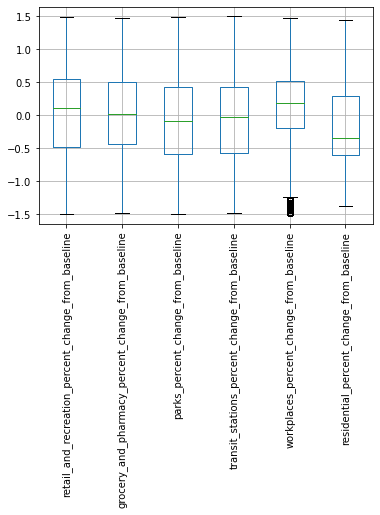

In [10]:
sample_z.boxplot(['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline' , 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline'], rot=90)

Text(0, 0.5, 'avg_distribution')

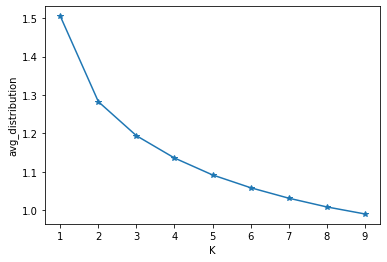

In [11]:
from scipy.spatial.distance import cdist
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
  model = KMeans(n_clusters = k)
  model.fit(sample_z)
  prediction = model.predict(sample_z)
  meanDistortions.append(sum(np.min(cdist(sample_z, model.cluster_centers_, 'euclidean'), axis = 1)) /sample_z
    .shape[0])
  
plt.plot(clusters, meanDistortions, "*-")
plt.xlabel('K')
plt.ylabel('avg_distribution')

cluster name retail, percentage of cluster in whole data 13.03% 
cluster name grocery, percentage of cluster in whole data 19.19% 
cluster name parks, percentage of cluster in whole data 16.40% 
cluster name transit, percentage of cluster in whole data 13.26% 
cluster name workplaces, percentage of cluster in whole data 22.08% 
cluster name residential, percentage of cluster in whole data 16.05% 


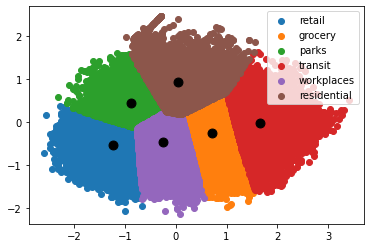

In [12]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = sample_z
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 6)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
##
sample_z['kmean'] = kmeans.labels_
cluster_count = sample_z['kmean'].value_counts()
cluster_count_sum = cluster_count.sum()
custer_count_sorted = cluster_count.sort_index()

#Getting unique labels
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_
#plotting the results:
columns = ["retail", "grocery", "parks", "transit", "workplaces", "residential"]
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label =columns[i])
    print ('cluster name {}, percentage of cluster in whole data {:.2f}% '.format(columns[i],(custer_count_sorted[i]*100)/cluster_count_sum))
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()
